In [1]:
# ------------------- Importing Required Libraries -------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# ------------------- Load Dataset -------------------

# Load the student performance data
file_path = r"D:\\SEMESTER 3\\Ishanth guptha\\assignment 8\\student\\Student_performance_data _.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [5]:
# ------------------- Feature Selection -------------------

# Define target variable (what we want to predict)
target = df['GPA']

# Define feature variables (removing non-predictive or target columns)
features = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])

In [7]:
# ------------------- Feature Scaling -------------------

# Normalize the feature data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
# ------------------- Data Splitting -------------------

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=81
)


In [11]:
# ------------------- Model Training -------------------

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# ------------------- Model Prediction and Evaluation -------------------

# Predict GPA on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("R-squared:", r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R-squared: 0.9561447040322378
Root Mean Squared Error: 0.1925711597399028


In [13]:
# ------------------- Feature Coefficient Analysis -------------------

# Create a DataFrame showing feature importance (model coefficients)
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

              Feature  Coefficient
7     ParentalSupport     0.169146
4     StudyTimeWeekly     0.165226
6            Tutoring     0.116099
8     Extracurricular     0.095628
9              Sports     0.088826
10              Music     0.059771
1              Gender     0.014132
2           Ethnicity     0.002789
3   ParentalEducation     0.001756
11       Volunteering    -0.001225
0                 Age    -0.007369
5            Absences    -0.844469


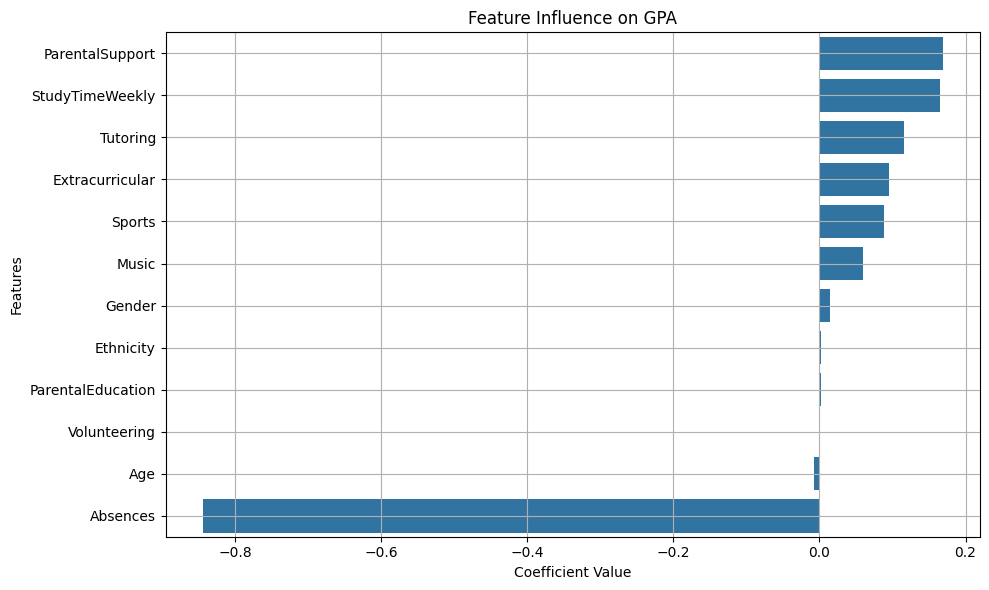

In [14]:
# ------------------- Visualization -------------------

# Visualize the impact of each feature on GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Influence on GPA')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# ------------------- Interpretation of Results -------------------

"""
- Features with high positive coefficients contribute positively to GPA.
- Features with negative coefficients are associated with lower GPA.
- The R-squared value indicates how well the model explains GPA variation.
"""

# ------------------- Feature Engineering Explanation -------------------

"""
1. Feature Selection:
   - Removed 'StudentID' as it's just an identifier.
   - Dropped 'GradeClass' since it's not the target for this model.
   - Retained variables like Age, Gender, Study Time, Absences, etc.

2. Feature Transformation:
   - Used StandardScaler to normalize all feature values.
   - This ensures that features contribute equally to model training.
   - No need for encoding as categorical values were already numerical (e.g., Gender, Tutoring).

3. Model Preparation:
   - After scaling, split the dataset into training and testing sets.
   - Trained a Linear Regression model to predict GPA based on the cleaned, transformed data.
"""


"\n1. Feature Selection:\n   - Removed 'StudentID' as it's just an identifier.\n   - Dropped 'GradeClass' since it's not the target for this model.\n   - Retained variables like Age, Gender, Study Time, Absences, etc.\n\n2. Feature Transformation:\n   - Used StandardScaler to normalize all feature values.\n   - This ensures that features contribute equally to model training.\n   - No need for encoding as categorical values were already numerical (e.g., Gender, Tutoring).\n\n3. Model Preparation:\n   - After scaling, split the dataset into training and testing sets.\n   - Trained a Linear Regression model to predict GPA based on the cleaned, transformed data.\n"